In [ ]:
pip install huaweicloudsdkocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.6/627.6 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 31.0 MB/s eta 0:00:00


In [ ]:
pip install pandas   #run this sceond command when you perfrom this lab in huawei notebook but if you are perfroming in google collab then no need to run this command

In [ ]:
pip install matplotlib  #run this sceond command when you perfrom this lab in huawei notebook but if you are perfroming in google collab then no need to run this command

In [ ]:
#run this sceond command when you perfrom this lab in huawei notebook but if you are perfroming in google collab then no need to run this command
mv /home/ma-user/modelarts-dev/modelarts-sdk/matplotlib /home/ma-user/modelarts-dev/modelarts-sdk/matplotlib_backup


In [ ]:
#run this sceond command when you perfrom this lab in huawei notebook but if you are perfroming in google collab then no need to run this command
pip install --upgrade --force-reinstall matplotlib

In [ ]:
from huaweicloudsdkcore.auth.credentials import BasicCredentials
from huaweicloudsdkocr.v1.region.ocr_region import OcrRegion
from huaweicloudsdkocr.v1.ocr_client import OcrClient
from huaweicloudsdkocr.v1.model.recognize_general_table_request import RecognizeGeneralTableRequest
from huaweicloudsdkocr.v1.model.general_table_request_body import GeneralTableRequestBody
import json

In [ ]:
# Step 1: Replace with your AK/SK
ak = "HPUA9WEEUIEIFVKADLB3"
sk = "lp8H2znzVmU8uVRQlhm4zkeKCKOAGjbUb9mOZ0t"

In [ ]:
import requests

api_key = 'K83318542688957'
image_url = 'https://exceldatapro.com/wp-content/uploads/2019/07/Student-Fee-Collection-System.jpg'

payload = {
    'url': image_url,
    'apikey': api_key,
    'language': 'eng',
    'isOverlayRequired': False
}

response = requests.post("https://api.ocr.space/parse/image", data=payload)

if response.status_code == 200:
    result = response.json()
    if result["IsErroredOnProcessing"]:
        print("Error:", result["ErrorMessage"])
    else:
        print("Text:\n", result["ParsedResults"][0]["ParsedText"])
else:
    print("Failed with status:", response.status_code)

Text:
 www.TxceCData"Pro.com
Student fee Collection System
Navigation Index and Fee Summary Report
call: .919687 SSSS63
Fee Receipt Sheet
Class
Nur-B
'KG.A
'KG.B
S KG.A
Fee Collection
Class Fee
Navigation
9300
9500
9700
Fee Pending
Sheet
pen dine Fee
N t ion
Nur-A
JKG-A
JKG-B
Total Fee
Due
Class-Wise
570000
576000
Fee Received
Class-Wise
401700
Outstanding
Difference
Summary
Class-Wise
152000
170000
176000
182000



In [ ]:
import re

# Example OCR text (define this based on your actual OCR output)
ocr_text = """
www.TxceCData"Pro.com
Student fee Collection System
Navigation Index and Fee Summary Report
call: .919687 SSSS63
Fee Receipt Sheet
Class
Nur-B
'KG.A
'KG.B
S KG.A
Fee Collection
Class Fee
Navigation
9300
9500
9700
Fee Pending
Sheet
pen dine Fee
N t ion
Nur-A
JKG-A
JKG-B
Total Fee
Due
Class-Wise
570000
576000
Fee Received
Class-Wise
401700
Outstanding
Difference
Summary
Class-Wise
152000
170000
176000
182000
"""

# Now the loop will work properly
for line in ocr_text.strip().split("\n"):
    # Match lines with pattern like: Item A  $3.00
    match = re.match(r'(Item \w+)\s+\$(\d+\.\d{2})', line)
    if match:
        item = match.group(1)
        price = float(match.group(2))
        print(f"{item}: ${price:.2f}")


In [ ]:
import pandas as pd

# Structured data from the OCR text (based on your input)
data = [
    {"Class": "Nur-A", "Total Fee": 570000, "Fee Received": 401700, "Outstanding": 152000},
    {"Class": "JKG-A", "Total Fee": 576000, "Fee Received": None, "Outstanding": 170000},
    {"Class": "JKG-B", "Total Fee": None,  "Fee Received": None, "Outstanding": 176000},
    {"Class": "KG-A",  "Total Fee": None,  "Fee Received": None, "Outstanding": 182000}
]

# Create the DataFrame
df = pd.DataFrame(data)

# Display it
print(df)


   Class  Total Fee  Fee Received  Outstanding
0  Nur-A   570000.0      401700.0       152000
1  JKG-A   576000.0           NaN       170000
2  JKG-B        NaN           NaN       176000
3   KG-A        NaN           NaN       182000


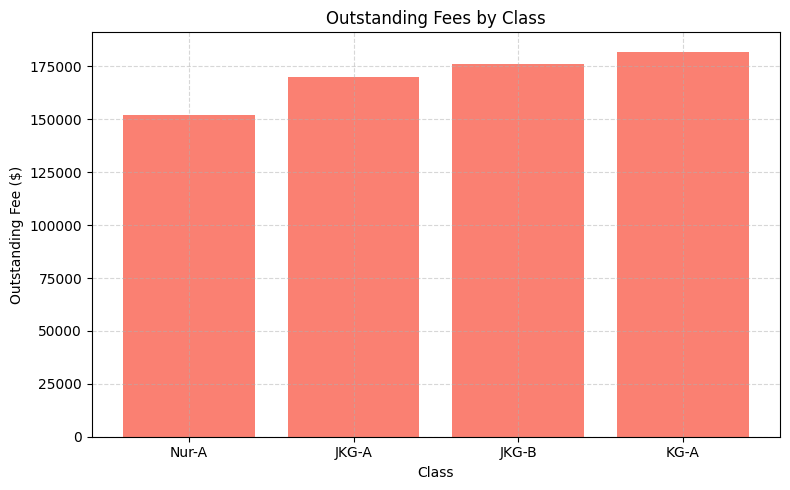

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df["Class"], df["Outstanding"], color="salmon")
plt.title("Outstanding Fees by Class")
plt.xlabel("Class")
plt.ylabel("Outstanding Fee ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
